# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import pandas as pd

In [2]:
db=pd.read_excel('geo.xlsx')

In [3]:
db.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
db_scaled = scaler.fit_transform(db)
db_scaled=pd.DataFrame(db_scaled, columns=db.columns)

C:\Users\volko\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\volko\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [5]:
db_scaled.head()

,x,y,comment_class
0,0.367919,0.159553,-0.378889
1,0.367919,0.159553,-0.378889
2,0.293178,-0.348131,-0.378889
3,-0.073819,-0.539880,-0.378889
4,-0.009022,-0.496273,-0.378889


In [6]:
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, DBSCAN

In [7]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(db_scaled[['x','y']])
    k_inertia.append(clf_kmeans.inertia_)

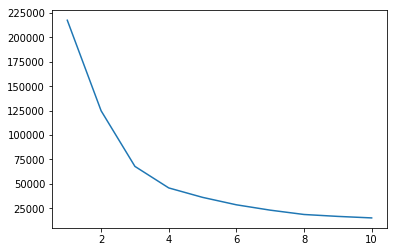

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(ks, k_inertia)

In [9]:
import numpy as np
diff = np.diff(k_inertia)
diff_r = diff[1:] / diff[:-1]
k_opt = ks[np.argmin(diff_r)+1]
k_opt

3

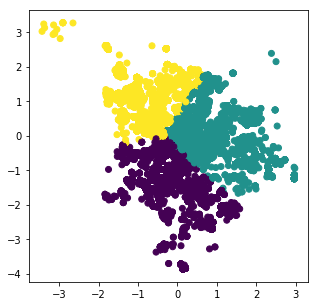

In [10]:
fig, axes = plt.subplots(figsize=(5, 5))
clf_kmeans_opt = KMeans(n_clusters=k_opt)
clusters_opt = clf_kmeans_opt.fit_predict(db_scaled[['x','y']])
axes.scatter(db_scaled['x'],db_scaled['y'],c=clusters_opt)

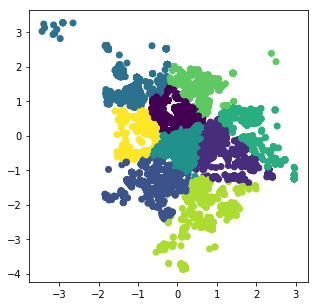

In [11]:
fig, axes = plt.subplots(figsize=(5, 5))
clf_kmeans_opt = KMeans(n_clusters=9)
clusters9 = clf_kmeans_opt.fit_predict(db_scaled[['x','y']])
axes.scatter(db_scaled['x'],db_scaled['y'],c=clusters9)

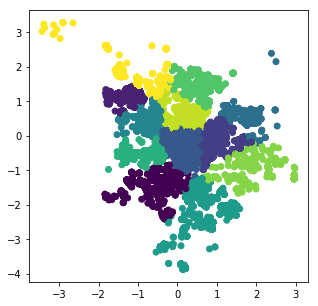

In [12]:
fig, axes = plt.subplots(figsize=(5, 5))
clf_kmeans_opt = KMeans(n_clusters=12)
clusters12 = clf_kmeans_opt.fit_predict(db_scaled[['x','y']])
axes.scatter(db_scaled['x'],db_scaled['y'],c=clusters12)

In [ ]:
from sklearn.metrics import silhouette_score
print (silhouette_score(db[['x','y']], clusters_opt))
print (silhouette_score(db[['x','y']], clusters9))
print (silhouette_score(db[['x','y']], clusters12))

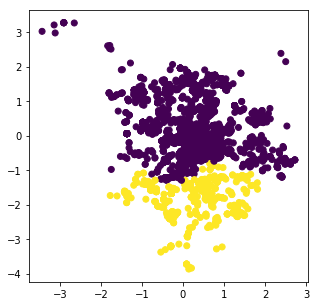

In [13]:
a=db_scaled[['x','y']].head(10000)
fig, axes = plt.subplots(figsize=(5, 5))
aggl_opt = AgglomerativeClustering()
clusters_aggl=aggl_opt.fit_predict(a)
axes.scatter(a['x'],a['y'],c=clusters_aggl)

C:\Users\volko\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return_n_iter=True)


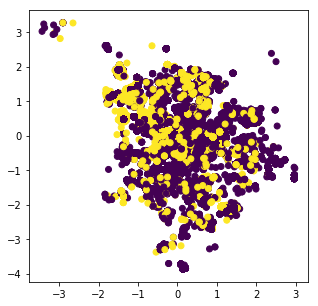

In [14]:
fig, axes = plt.subplots(figsize=(5, 5))
clf_kmeans_opt_comment = KMeans(n_clusters=11)
clusters_com = clf_kmeans_opt_comment.fit_predict(db_scaled[['comment_class']])
axes.scatter(db_scaled['x'],db_scaled['y'],c=clusters_com)

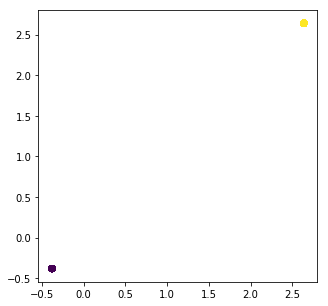

In [15]:
fig, axes = plt.subplots(figsize=(5, 5))
axes.scatter(db_scaled['comment_class'],db_scaled['comment_class'],c=clusters_com)

In [16]:
db['cluster_xy']=clusters12

In [17]:
table=pd.pivot_table(db, columns=['comment_class'],values=['x'],index=['cluster_xy'], aggfunc=lambda x:len(x))

In [18]:
table.columns=table.columns.droplevel()

In [19]:
table['sum']=table[-1]+table[1]
table['-1%']=table[-1]/table['sum']
table['1%']=table[1]/table['sum']

In [20]:
db['cluster_xy-2']=clusters_opt
table2=pd.pivot_table(db, columns=['comment_class'],values=['x'],index=['cluster_xy-2'], aggfunc=lambda x:len(x))
table2.columns=table2.columns.droplevel()
table2['sum']=table2[-1]+table2[1]
table2['-1%']=table2[-1]/table2['sum']
table2['1%']=table2[1]/table2['sum']

In [21]:
table

comment_class,-1,1,sum,-1%,1%
cluster_xy,,,,,
0,18011.0,132.0,18143.0,0.992724,0.007276
1,6773.0,1573.0,8346.0,0.811526,0.188474
2,17712.0,274.0,17986.0,0.984766,0.015234
3,15021.0,4529.0,19550.0,0.768338,0.231662
4,3935.0,3414.0,7349.0,0.535447,0.464553
5,9737.0,1116.0,10853.0,0.897171,0.102829
6,1878.0,645.0,2523.0,0.744352,0.255648
7,3641.0,48.0,3689.0,0.986988,0.013012
8,1980.0,1232.0,3212.0,0.616438,0.383562


In [ ]:
fig, axes = plt.subplots(figsize=(5, 5))
clf_dbscan = DBSCAN()
clusters_dbscan = clf_dbscan.fit_predict(db_scaled[['comment_class']])
axes.scatter(db_scaled['x'],db_scaled['y'],c=clusters_dbscan)